# R4-Unsupervised Learning - Project 1 - Cars Dataset

In [120]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.model_selection import train_test_split



%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [121]:
car_data = pd.read_csv("cars-dataset.csv") 

In [122]:
car_data.shape

(398, 8)

In [123]:
car_data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [124]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [125]:
car_data.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [ ]:
#Observation:
#-disp, wt, acc are continous data. 
#-cyl, yr are discrete data
#-Column "hp" has continuous values but the data type is Object.

In [126]:
# checking dataset for null values
print(car_data.isna().sum())

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64


In [127]:
#Unique values in 'car name col'
car_data['car name'].nunique()

305

In [128]:
#Unique values in 'hp col'
car_data['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [129]:
# here we can see that , one of the unique values is '?'
# printing No of rows having '?' 

car_data[car_data['hp'] == "?"]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [130]:
# there are 6 rows , so we would replace the same with mean

# replace ? with NAN value
car_data.replace('?',np.NAN,inplace=True)

car_data['hp'] = car_data['hp'].astype('float64')

#replace it with the mean
car_data['hp'].replace(np.NAN, np.mean(car_data['hp']), inplace=True)

#Summary Statistics after replacing the hp with mean
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


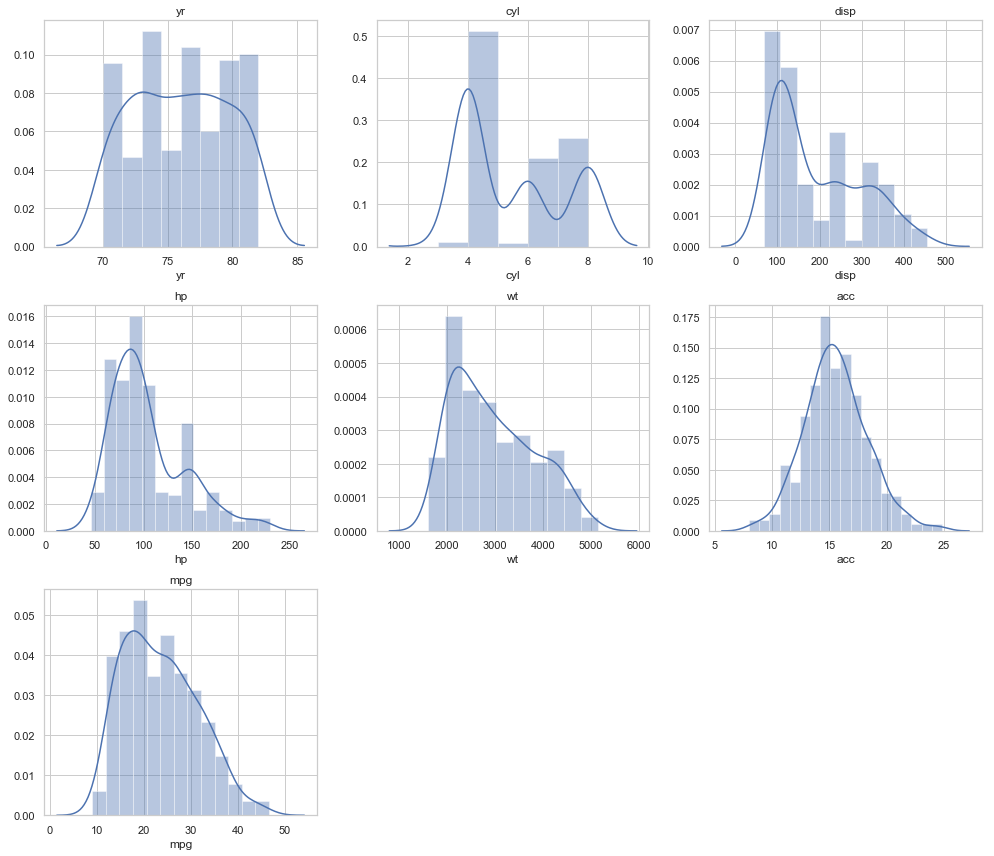

In [131]:
# Univariate analysis
fig = plt.figure(figsize=(14,12))
sns.set_style('whitegrid')

plt.subplot2grid((3,3),(0,0))
plt.title("yr")
sns.distplot(car_data['yr'])

plt.subplot2grid((3,3),(0,1))
plt.title("cyl")
sns.distplot(car_data['cyl'])

plt.subplot2grid((3,3),(0,2))
plt.title("disp")
sns.distplot(car_data['disp'])

plt.subplot2grid((3,3),(1,0))
plt.title("hp")
sns.distplot(car_data['hp'])

plt.subplot2grid((3,3),(1,1))
plt.title("wt")
sns.distplot(car_data['wt'])

plt.subplot2grid((3,3),(1,2))
plt.title("acc")
sns.distplot(car_data['acc'])

plt.subplot2grid((3,3),(2,0))
plt.title("mpg")
sns.distplot(car_data['mpg'])


plt.tight_layout()

In [499]:
#Observation:
#-cyl have 3 peaks - there might be 3 groups or categories
#-mpg and acc have somewhat normalised distribution
#-hp has symmetry 

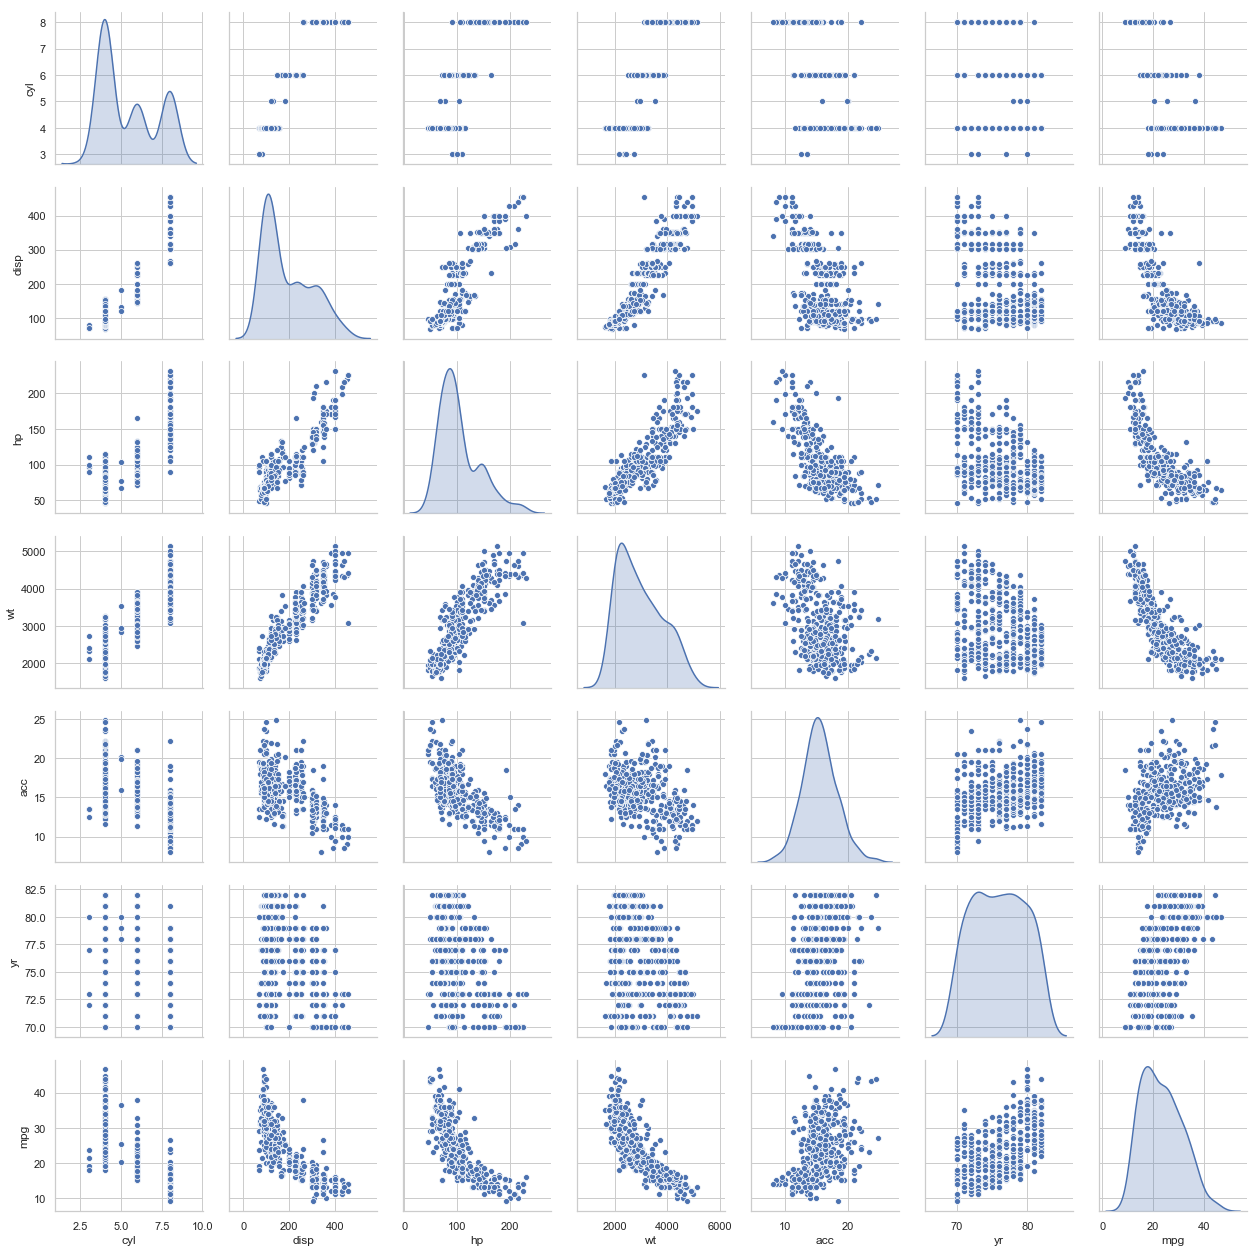

In [135]:
# Bivariate analysis
sns.pairplot(data=car_data, diag_kind='kde');

In [500]:
#Observation:
#-strong positive corelation between cyl, disp, hp, wt 
#-acc, yr, mpg are negatively correlated.

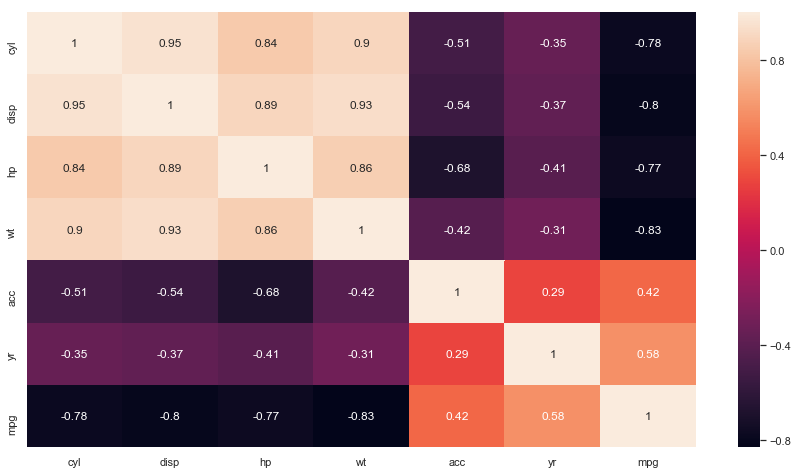

In [137]:
sns.set(rc={'figure.figsize':(15,8)})
corr = car_data.corr()
sns.heatmap(corr, annot=True)

In [138]:
#KMeans Clustering

In [139]:
X = car_data.drop('mpg', axis=1, inplace=False)

y = car_data[['mpg']] #removing the target column for Unsupervised Algorithm

In [140]:
X.shape

(398, 7)

In [141]:
y.shape

(398, 1)

In [142]:
# Data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop('car name', axis=1, inplace=False))

# statistics of scaled data
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.171742e-16,-8.312725e-17,4.287469e-16,-9.902743e-17,8.982206e-17,-8.837152e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.532571e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00
25%,-8.563206e-01,-8.563178e-01,-7.462258e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01
50%,-8.563206e-01,-4.314040e-01,-2.482070e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03
75%,1.498191e+00,6.584879e-01,5.381385e-01,7.538337e-01,5.834349e-01,8.096310e-01
max,1.498191e+00,2.511784e+00,3.290348e+00,2.565185e+00,3.351912e+00,1.621983e+00


In [143]:
# KMeans Clustring Algorithm
from sklearn.cluster import KMeans

# Label, Intertia and Centroid
cluster_range = range(2, 20)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(X_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1069.715267
1,3,808.948714
2,4,641.795074
3,5,564.119079
4,6,496.454541
5,7,450.405577
6,8,410.489902
7,9,379.520399
8,10,349.628537
9,11,325.438598


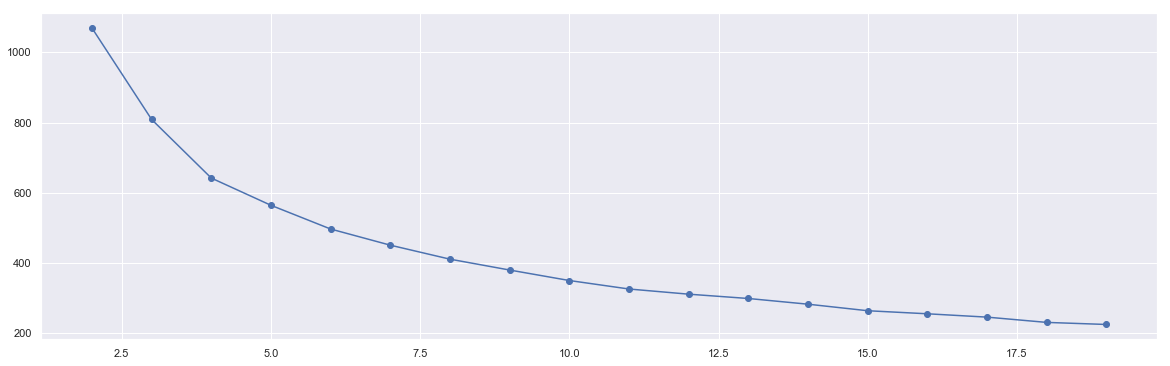

In [144]:
plt.figure(figsize=(20,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [ ]:
#The optimal value of k  would be 4 as we notice sudden drop in the above Elbow graph.

In [501]:
cluster = KMeans(n_clusters = 4, init='k-means++' )
cluster.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [502]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[ 0.41904   ,  0.30607355, -0.04129057,  0.33609827,  0.28833249,
         0.06647894],
       [-0.84667093, -0.78000886, -0.68867275, -0.73705417,  0.35055852,
         1.04712198],
       [ 1.49819126,  1.50068407,  1.51072373,  1.40001604, -1.07612225,
        -0.6725559 ],
       [-0.84338369, -0.82363215, -0.61301679, -0.80582153,  0.36828078,
        -0.76746347]])

In [503]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns = list(X_scaled) )

In [504]:
prediction=cluster.predict(X_scaled)
data_scaled = pd.DataFrame(X_scaled)
data_scaled["GROUP"] = prediction

In [505]:
# Count the number of records per group to check the group symmetry 


data_scaled["GROUP"].value_counts()

1    122
2     95
3     91
0     90
Name: GROUP, dtype: int64

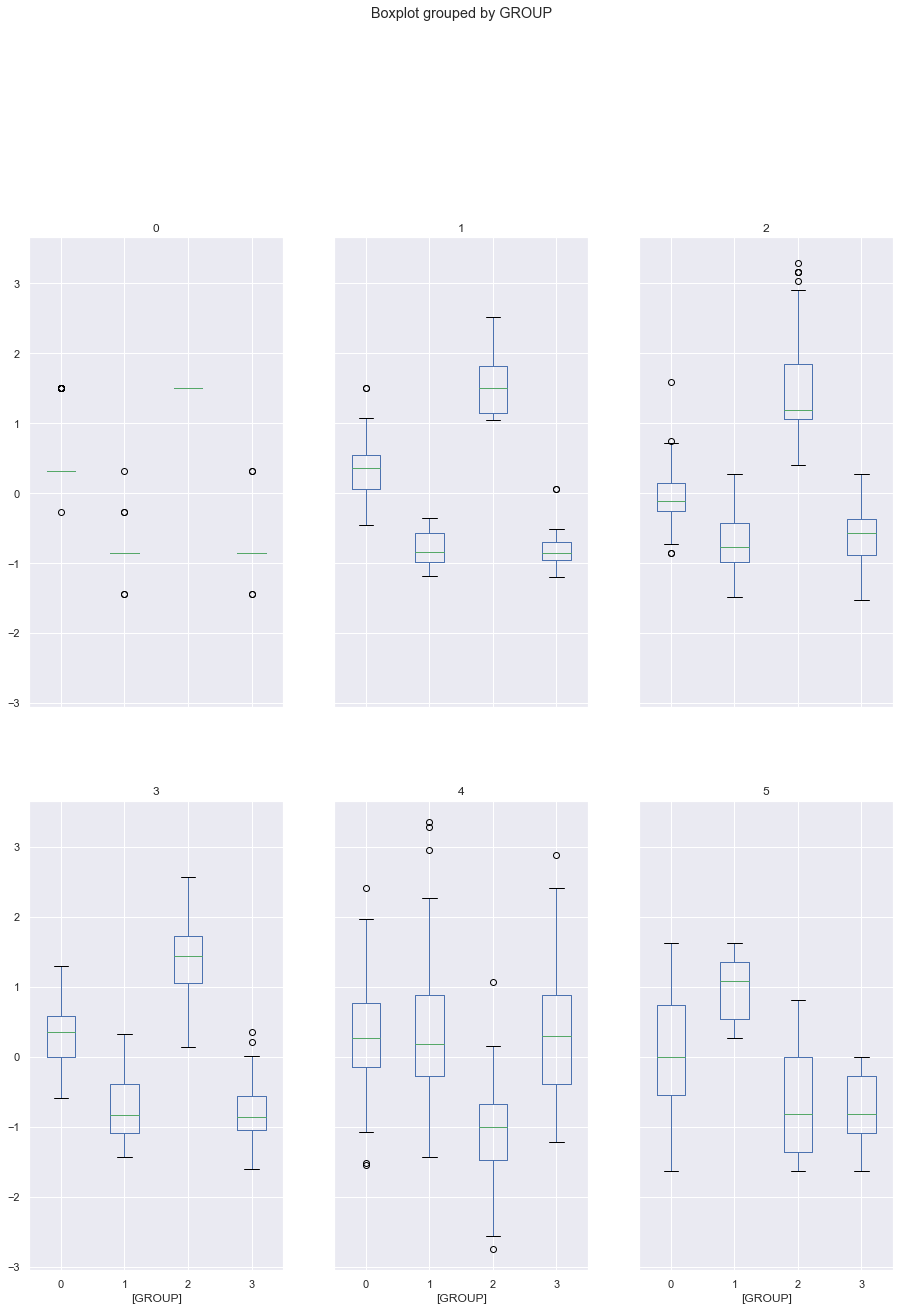

In [506]:
import matplotlib.pylab as plt
data_scaled.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40));

In [219]:
#Identifying and seperating the clusters based on the labels  

In [507]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = car_data.index.values 
cluster_map['cluster'] = cluster.labels_

In [508]:
df_c1 = car_data.loc[cluster_map[cluster_map['cluster'] == 0]['data_index']]

In [509]:
df_c1.shape

(90, 8)

In [510]:
df_c2 = car_data.loc[cluster_map[cluster_map['cluster'] == 1]['data_index']]
df_c3 = car_data.loc[cluster_map[cluster_map['cluster'] == 2]['data_index']]
df_c4 = car_data.loc[cluster_map[cluster_map['cluster'] == 3]['data_index']]

In [511]:
df_c2.shape

(122, 8)

In [512]:
df_c3.shape

(95, 8)

In [513]:
df_c4.shape

(91, 8)

In [514]:
#Applying Linear Regression on seperate clusters

In [515]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [516]:
#Cluster 1 

In [517]:
X1 = df_c1.drop(["mpg","car name"], axis=1)

In [518]:
X1.shape

(90, 6)

In [519]:
y1 = df_c1["mpg"]

In [520]:
#lr = LinearRegression()
#lr.fit(X1, y1)

In [693]:
#Splitting cluster into 70:30
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=21)

In [694]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

In [695]:
# Train R^2 - Coefficient of Determination
print(lr.score(X_train, y_train))

0.4575048152874269


In [696]:
# Test R^2 - Coefficient of Determination
print(lr.score(X_test, y_test))

0.4421268110020785


In [ ]:
#Coefficient of model-R2 - 44.21%

In [ ]:
# Cluster 2  

In [573]:
X2 = df_c2.drop(["mpg","car name"], axis=1)

In [574]:
y2 = df_c2["mpg"]

In [669]:
#Splitting cluster into 70:30
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=0)

In [670]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

In [671]:
# Train R^2
print(lr.score(X_train, y_train))

0.6050641407198798


In [672]:
# Test R^2
print(lr.score(X_test, y_test))

0.6944672147161431


In [ ]:
#Coefficient of model-R2 - 69.44%

In [603]:
#Cluster 3 

In [604]:
X3 = df_c3.drop(["mpg","car name"], axis=1)

In [605]:
y3 = df_c3["mpg"]

In [622]:
#Splitting cluster into 70:30
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.30, random_state=21)

In [623]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

In [624]:
# Train R^2
print(lr.score(X_train, y_train))

0.5121271114921517


In [625]:
# Test R^2
print(lr.score(X_test, y_test))

0.6589755475525095


In [ ]:
#Coefficient of model-R2 - 65.89%

In [626]:
#Cluster 4

In [627]:
X4 = df_c4.drop(["mpg","car name"], axis=1)

In [628]:
y4 = df_c4["mpg"]

In [661]:
#Splitting cluster into 70:30
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.30, random_state=19)

In [662]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

In [663]:
# Train R^2
print(lr.score(X_train, y_train))

0.6297488455807112


In [664]:
# Test R^2
print(lr.score(X_test, y_test))

0.6333232065310952


In [ ]:
#Coefficient of model-R2 - 63.33%